##### In this notebook we perform some data exploration to familiarize ourselves with the dataset and to uncover meaningful insights from it.

In [ ]:
import numpy as np
import pandas as pd
#Visualization
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

We start by reading the data and then we look at some basic information about it.

In [ ]:
df=pd.read_csv("balanced_dataset.csv")
df.shape

(7957, 48)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flow_duration    7957 non-null   float64
 1   Header_Length    7957 non-null   float64
 2   Protocol Type    7957 non-null   float64
 3   Duration         7957 non-null   float64
 4   Rate             7957 non-null   float64
 5   Srate            7957 non-null   float64
 6   Drate            7957 non-null   float64
 7   fin_flag_number  7957 non-null   float64
 8   syn_flag_number  7957 non-null   float64
 9   rst_flag_number  7957 non-null   float64
 10  psh_flag_number  7957 non-null   float64
 11  ack_flag_number  7957 non-null   float64
 12  ece_flag_number  7957 non-null   float64
 13  cwr_flag_number  7957 non-null   float64
 14  ack_count        7957 non-null   float64
 15  syn_count        7957 non-null   float64
 16  fin_count        7957 non-null   float64
 17  urg_count     

## Checking null values

We check for null values. As it can be seen we don´t have any null value.

In [ ]:
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
family       

## Checking duplicated samples

In [ ]:
dp = df.duplicated().sum()
print("There are ", dp, " duplicated samples")

There are  0  duplicated samples


## Descriptive statistics

##### Boolean variables:
application layer protocol: HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,DHCP
transport layer protocol: TCP,UDP,
link layer protocol: ARP,LLC
network layer protocol: ICMP,IPv

##### Numerical variables:
The rest

In [ ]:
# Select only the numeric columns
df_noTarget = df.select_dtypes(include=[np.number])
binary_columns = ['DNS', 'Telnet', 'SMTP', 'HTTP', 'HTTPS', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']
numeric_df = df_noTarget.drop(columns=binary_columns, errors='ignore')  # errors='ignore' allows for columns that don't exist to be skipped without raising an error


In [ ]:
descriptive_stats = numeric_df.describe()
descriptive_stats

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,7957.000000,7.957000e+03,7957.000000,7957.000000,7.957000e+03,7.957000e+03,7957.000000,7957.000000,7957.000000,7957.000000,...,7957.000000,7957.000000,7957.000000,7.957000e+03,7957.000000,7957.000000,7957.000000,7.957000e+03,7957.000000,7957.000000
mean,186.298122,4.463363e+05,11.844174,86.984066,4.118869e+03,4.118869e+03,0.000002,0.015584,0.082946,0.031796,...,364.201867,198.502770,364.945282,8.383708e+07,9.523956,22.310790,280.461765,1.988402e+05,0.559715,142.170916
std,2123.486385,1.177811e+06,11.276420,39.315146,4.946341e+04,4.946341e+04,0.000180,0.123866,0.275818,0.175467,...,510.404448,370.234638,515.464770,6.521886e+07,3.130532,14.728757,523.787824,7.153372e+05,0.435960,80.618602
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,1.192093e-06,1.500000,9.165151,0.000000,0.000000e+00,0.000000,2.500000
25%,0.035050,1.080000e+02,6.000000,64.000000,4.804670e+00,4.804670e+00,0.000000,0.000000,0.000000,0.000000,...,57.331270,0.000000,57.000000,2.513340e-02,5.500000,10.695253,0.000000,0.000000e+00,0.000000,38.500000
50%,4.119579,9.826100e+03,7.100000,65.690000,2.919432e+01,2.919432e+01,0.000000,0.000000,0.000000,0.000000,...,122.870278,37.933863,119.900000,8.315069e+07,9.500000,15.553688,53.445809,2.555054e+03,0.800000,141.550000
75%,46.603717,1.430274e+05,13.700000,99.200000,1.098648e+02,1.098648e+02,0.000000,0.000000,0.000000,0.000000,...,554.000000,178.736207,554.000000,1.665188e+08,13.500000,33.286634,252.473607,5.073225e+04,1.000000,244.600000
max,99435.761782,9.761749e+06,47.000000,255.000000,2.097152e+06,2.097152e+06,0.016070,1.000000,1.000000,1.000000,...,3948.276224,4476.477146,3956.700000,1.676394e+08,14.500000,88.909675,6341.814708,2.025227e+07,1.000000,244.600000


### Univariate outliers detection using Z-Score Method

In [ ]:
import numpy as np

def detect_outliers_z_score(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return np.where(z_scores > threshold)


In [ ]:
for col in numeric_df.columns:
    data=np.array(df[col])
    outliers_indices = detect_outliers_z_score(data)
    outliers = data[outliers_indices]
    if(len(outliers)>0):
        print("VARIABLE "+ col+ "has " + str(len(outliers)) +" outliers")
        # print("Outliers indices:", outliers_indices)
        # print("Outliers:", outliers)

VARIABLE flow_durationhas 25 outliers
VARIABLE Header_Lengthhas 219 outliers
VARIABLE Protocol Typehas 575 outliers
VARIABLE Durationhas 205 outliers
VARIABLE Ratehas 42 outliers
VARIABLE Sratehas 42 outliers
VARIABLE Dratehas 1 outliers
VARIABLE fin_flag_numberhas 124 outliers
VARIABLE syn_flag_numberhas 660 outliers
VARIABLE rst_flag_numberhas 253 outliers
VARIABLE psh_flag_numberhas 364 outliers
VARIABLE ack_counthas 224 outliers
VARIABLE syn_counthas 41 outliers
VARIABLE fin_counthas 318 outliers
VARIABLE urg_counthas 142 outliers
VARIABLE rst_counthas 234 outliers
VARIABLE Tot sumhas 197 outliers
VARIABLE Minhas 223 outliers
VARIABLE Maxhas 119 outliers
VARIABLE AVGhas 198 outliers
VARIABLE Stdhas 165 outliers
VARIABLE Tot sizehas 210 outliers
VARIABLE Magnituehas 121 outliers
VARIABLE Radiushas 166 outliers
VARIABLE Covariancehas 107 outliers
/tmp/ipykernel_164/244431613.py:4: RuntimeWarning:

invalid value encountered in divide



## Data Distribution

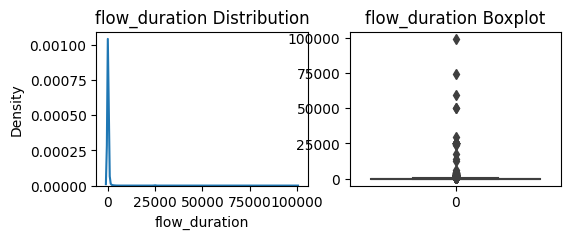

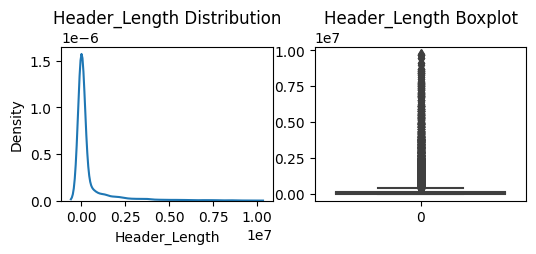

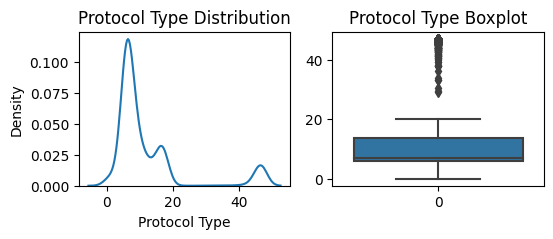

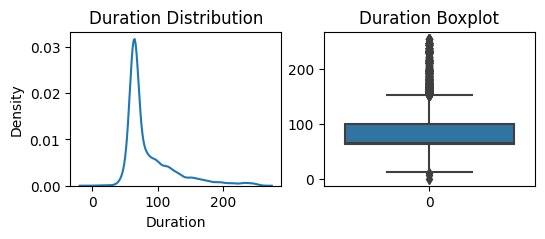

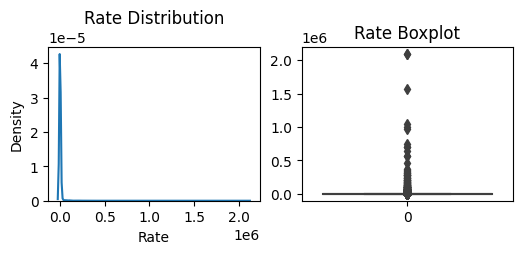

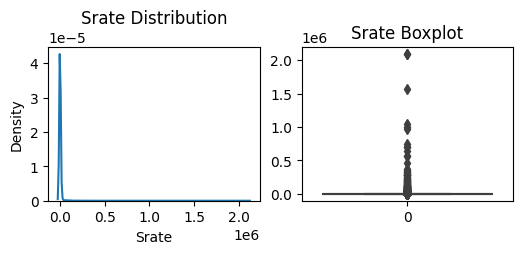

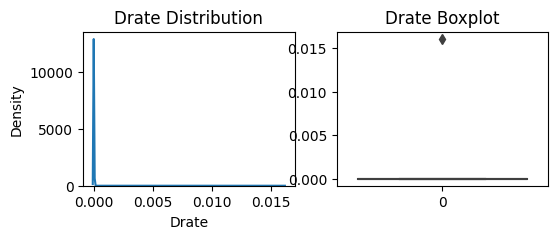

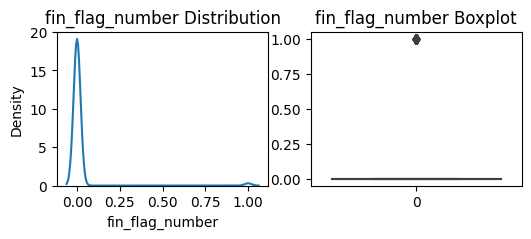

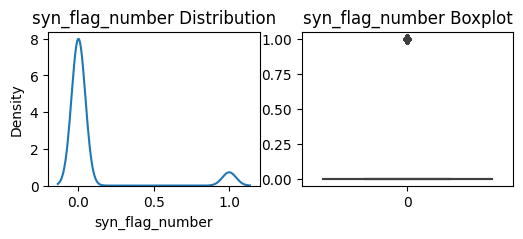

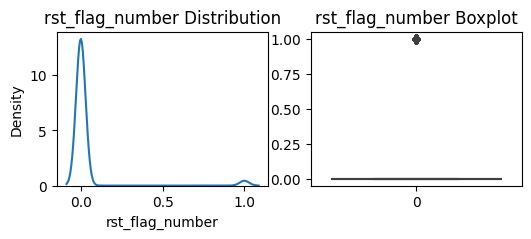

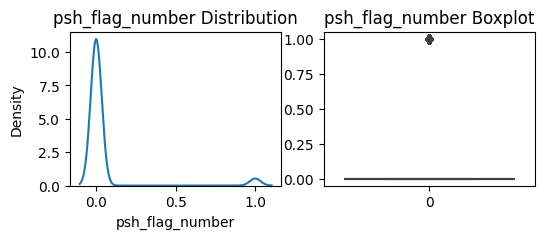

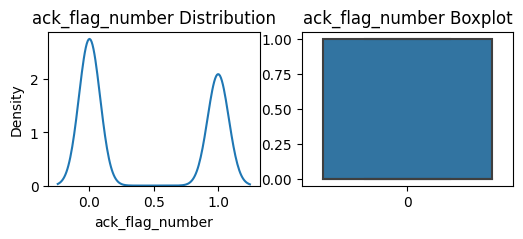

/tmp/ipykernel_90/3406439824.py:5: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



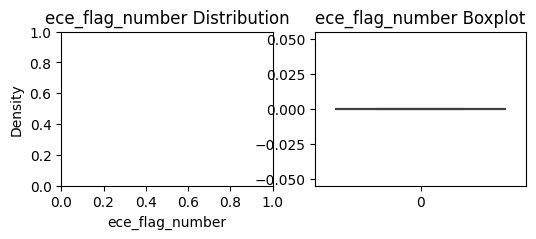

/tmp/ipykernel_90/3406439824.py:5: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



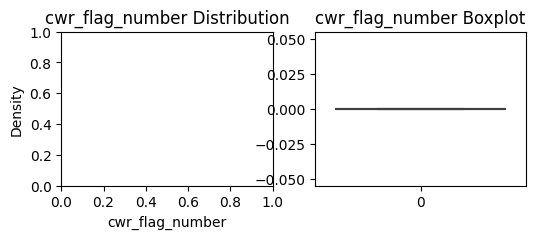

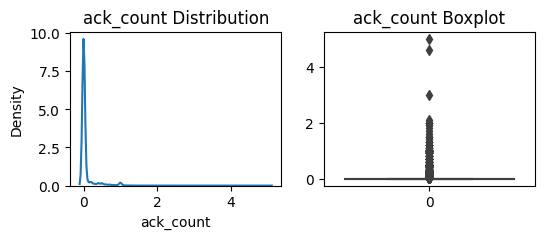

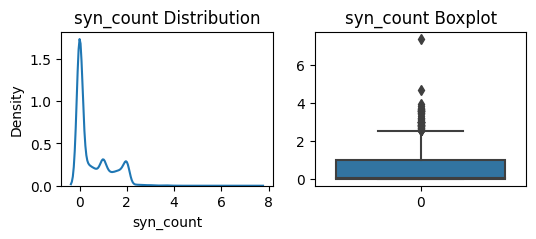

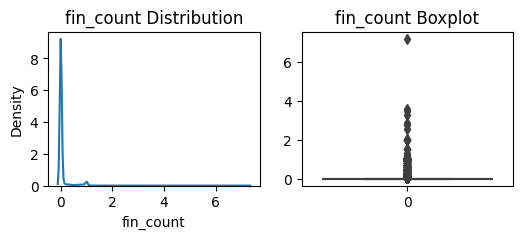

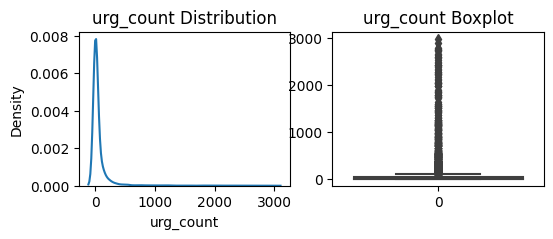

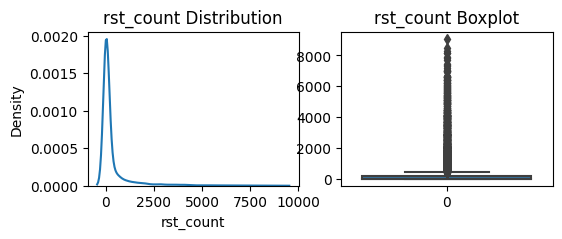

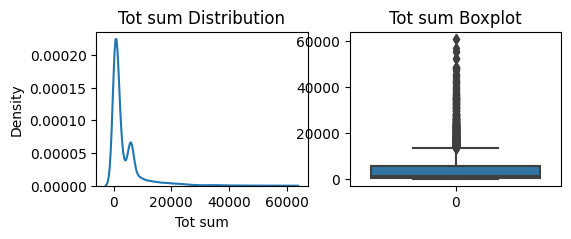

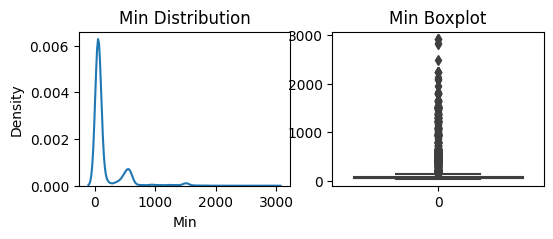

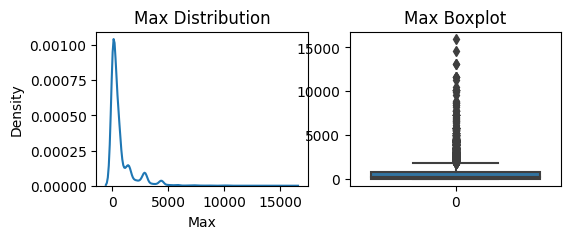

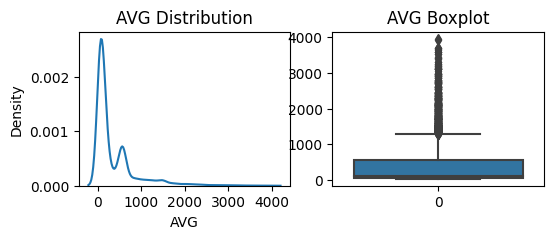

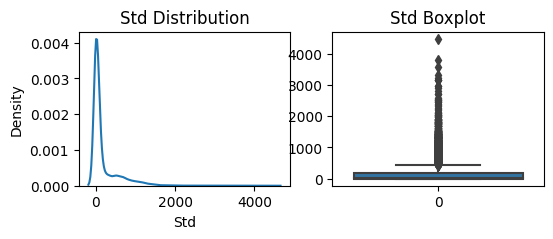

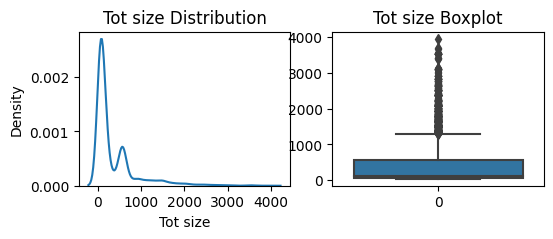

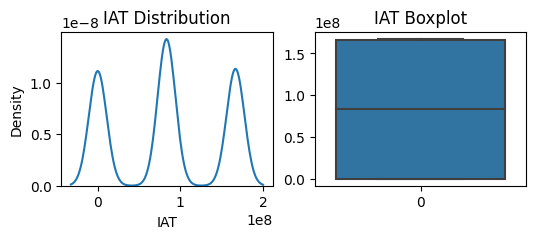

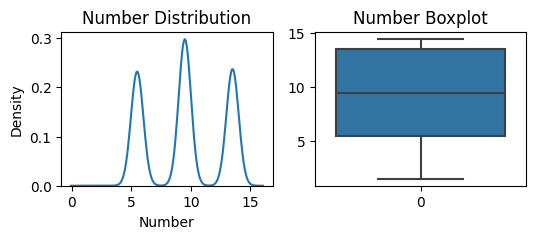

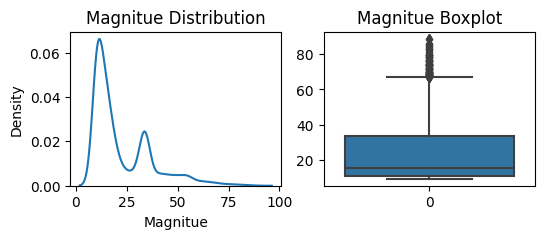

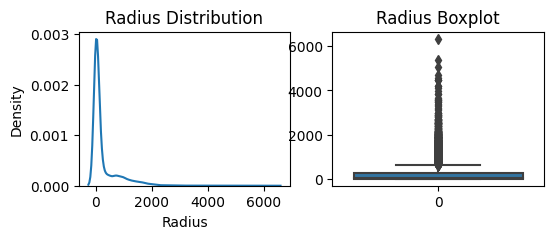

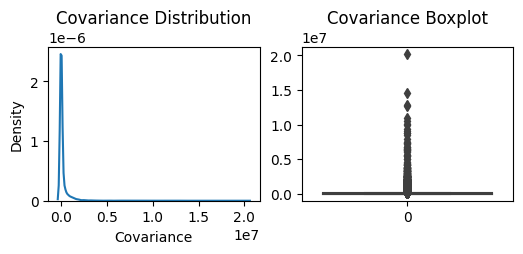

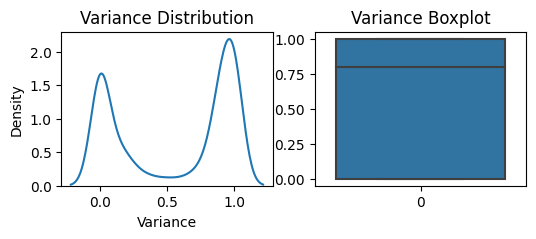

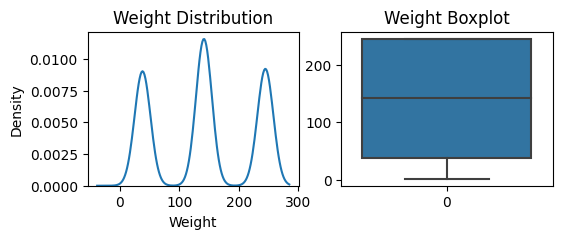

In [ ]:
for col in numeric_df.columns:
    x = df[col]
    plt.figure(figsize=(6, 2))
    plt.subplot(1, 2, 1)
    p = sns.kdeplot(x)
    plt.title(col + ' Distribution')
    plt.subplot(1, 2, 2)
    sns.boxplot(x)
    plt.title(col + ' Boxplot')
    plt.show()

In [ ]:
dict(df_noTarget[column].value_counts())

{0.0: 7957}

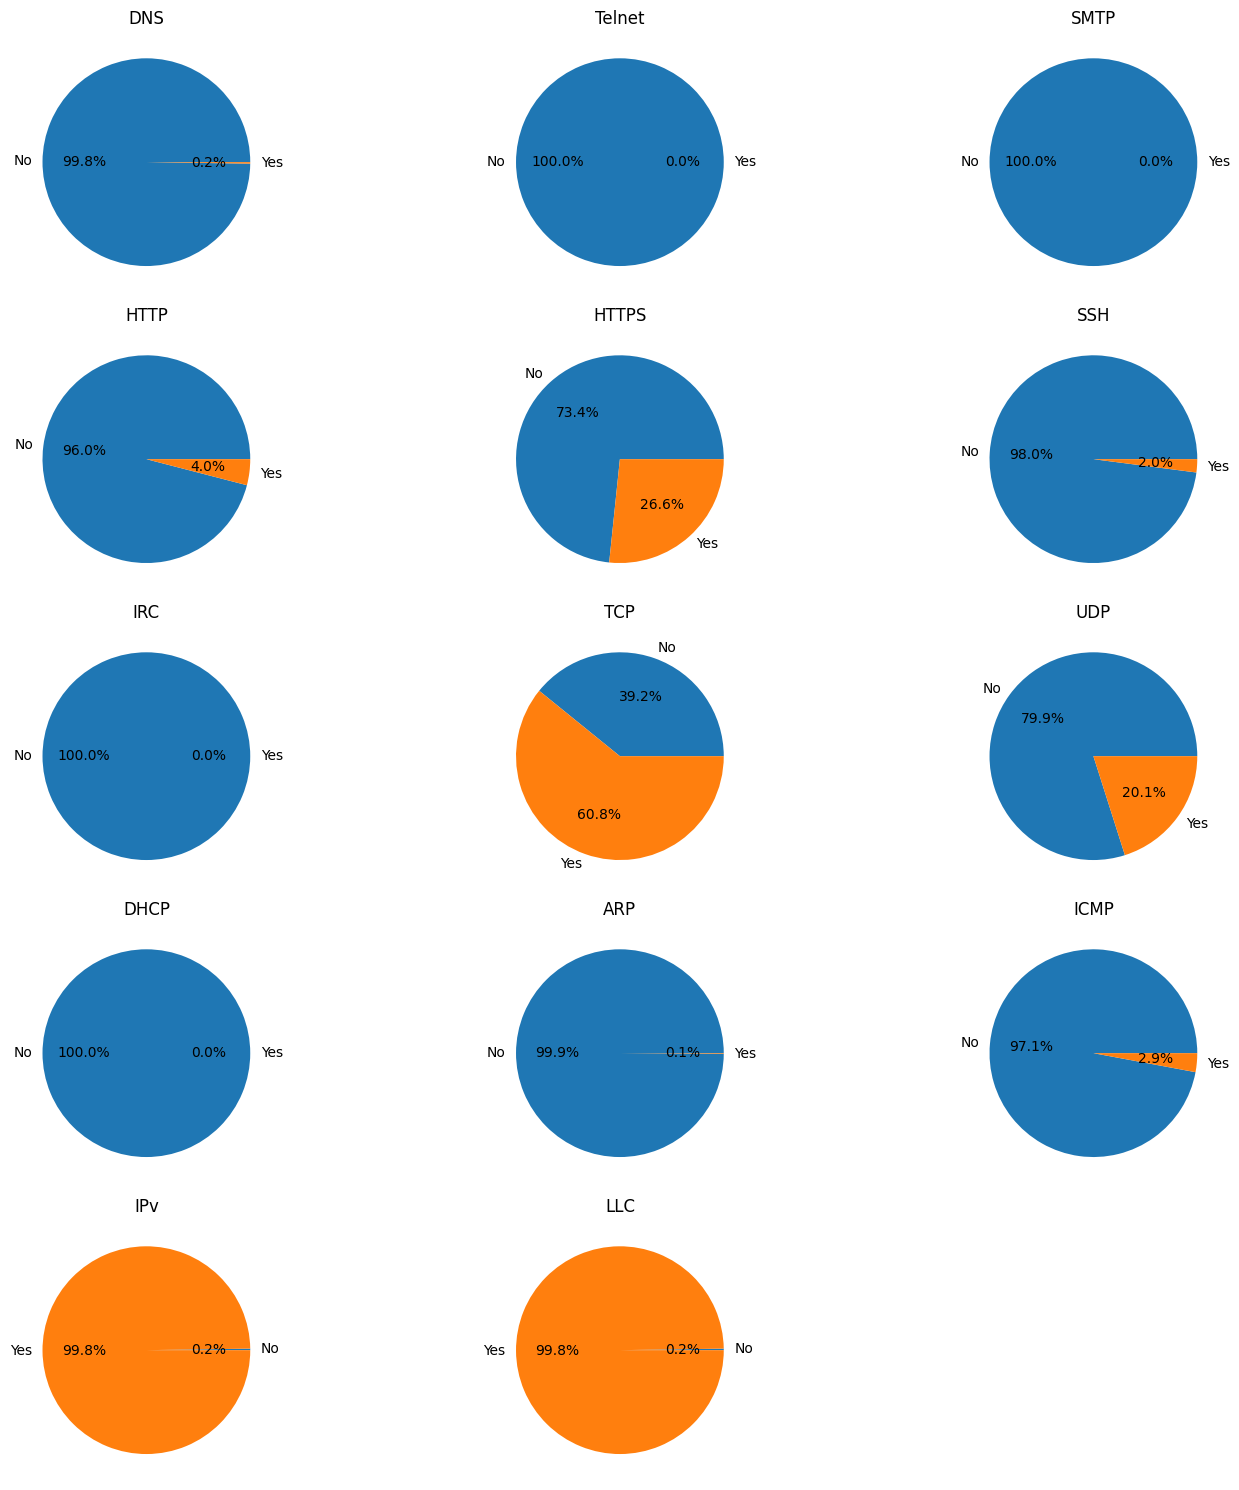

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
 
n_cols = 3
n_rows = (len(binary_columns) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

for ax, col in zip(axes, binary_columns):
    # Creating plot
    dic=dict(df_noTarget[col].value_counts())
    positives=0
    negatives=0
    if 0.0 in dic.keys():
        negatives=dic[0.0]
    if 1.0 in dic.keys():
        positives=dic[1.0] 
    data=[negatives,positives]
    
    ax.set_title(f'{col}')
    ax.pie(data, labels = ['No','Yes'], autopct='%1.1f%%')

# Hide any empty subplots that aren't needed
for ax in axes[len(binary_columns):]:
    ax.set_visible(False)

# Adjust the layout so labels don't overlap
plt.tight_layout()  
# show plot
plt.show()

### Histograms for numerical variables

In order to try to understand the distribution of the numerical variables we do some histograms.

Some observations that can be drawn from the plots are:

- The distribution is heavily skewed towards smaller header lengths, indicating that most packets have smaller headers.

-  Both Rate and Srate show that most flows have a very low rate of packet transmission, with very few flows having a higher rate.

- Drate is also skewed towards lower values, indicating most flows have a low rate of packet reception.

- Tot sum (Total sum of packet lengths) has most values concentrated at the lower end, suggesting that the majority of flows consist of small total packet sizes.

- Min (Minimum packet length) and Max (Maximum packet length) show that most packets are small, with a few larger packets present in the network flows.

- AVG (Average packet length) and Std (Standard deviation of packet length) also show right-skewed distributions, indicating that most flows have smaller average packet sizes and low variability in packet sizes.

- Histogram of Number: The distribution shows several peaks, which may represent common numbers of packets in flows. This could be related to the typical session lengths or transaction types on the network.

The common theme across these histograms is that many network flow characteristics are concentrated around lower values, indicating that the network is dominated by smaller, less variable flows.

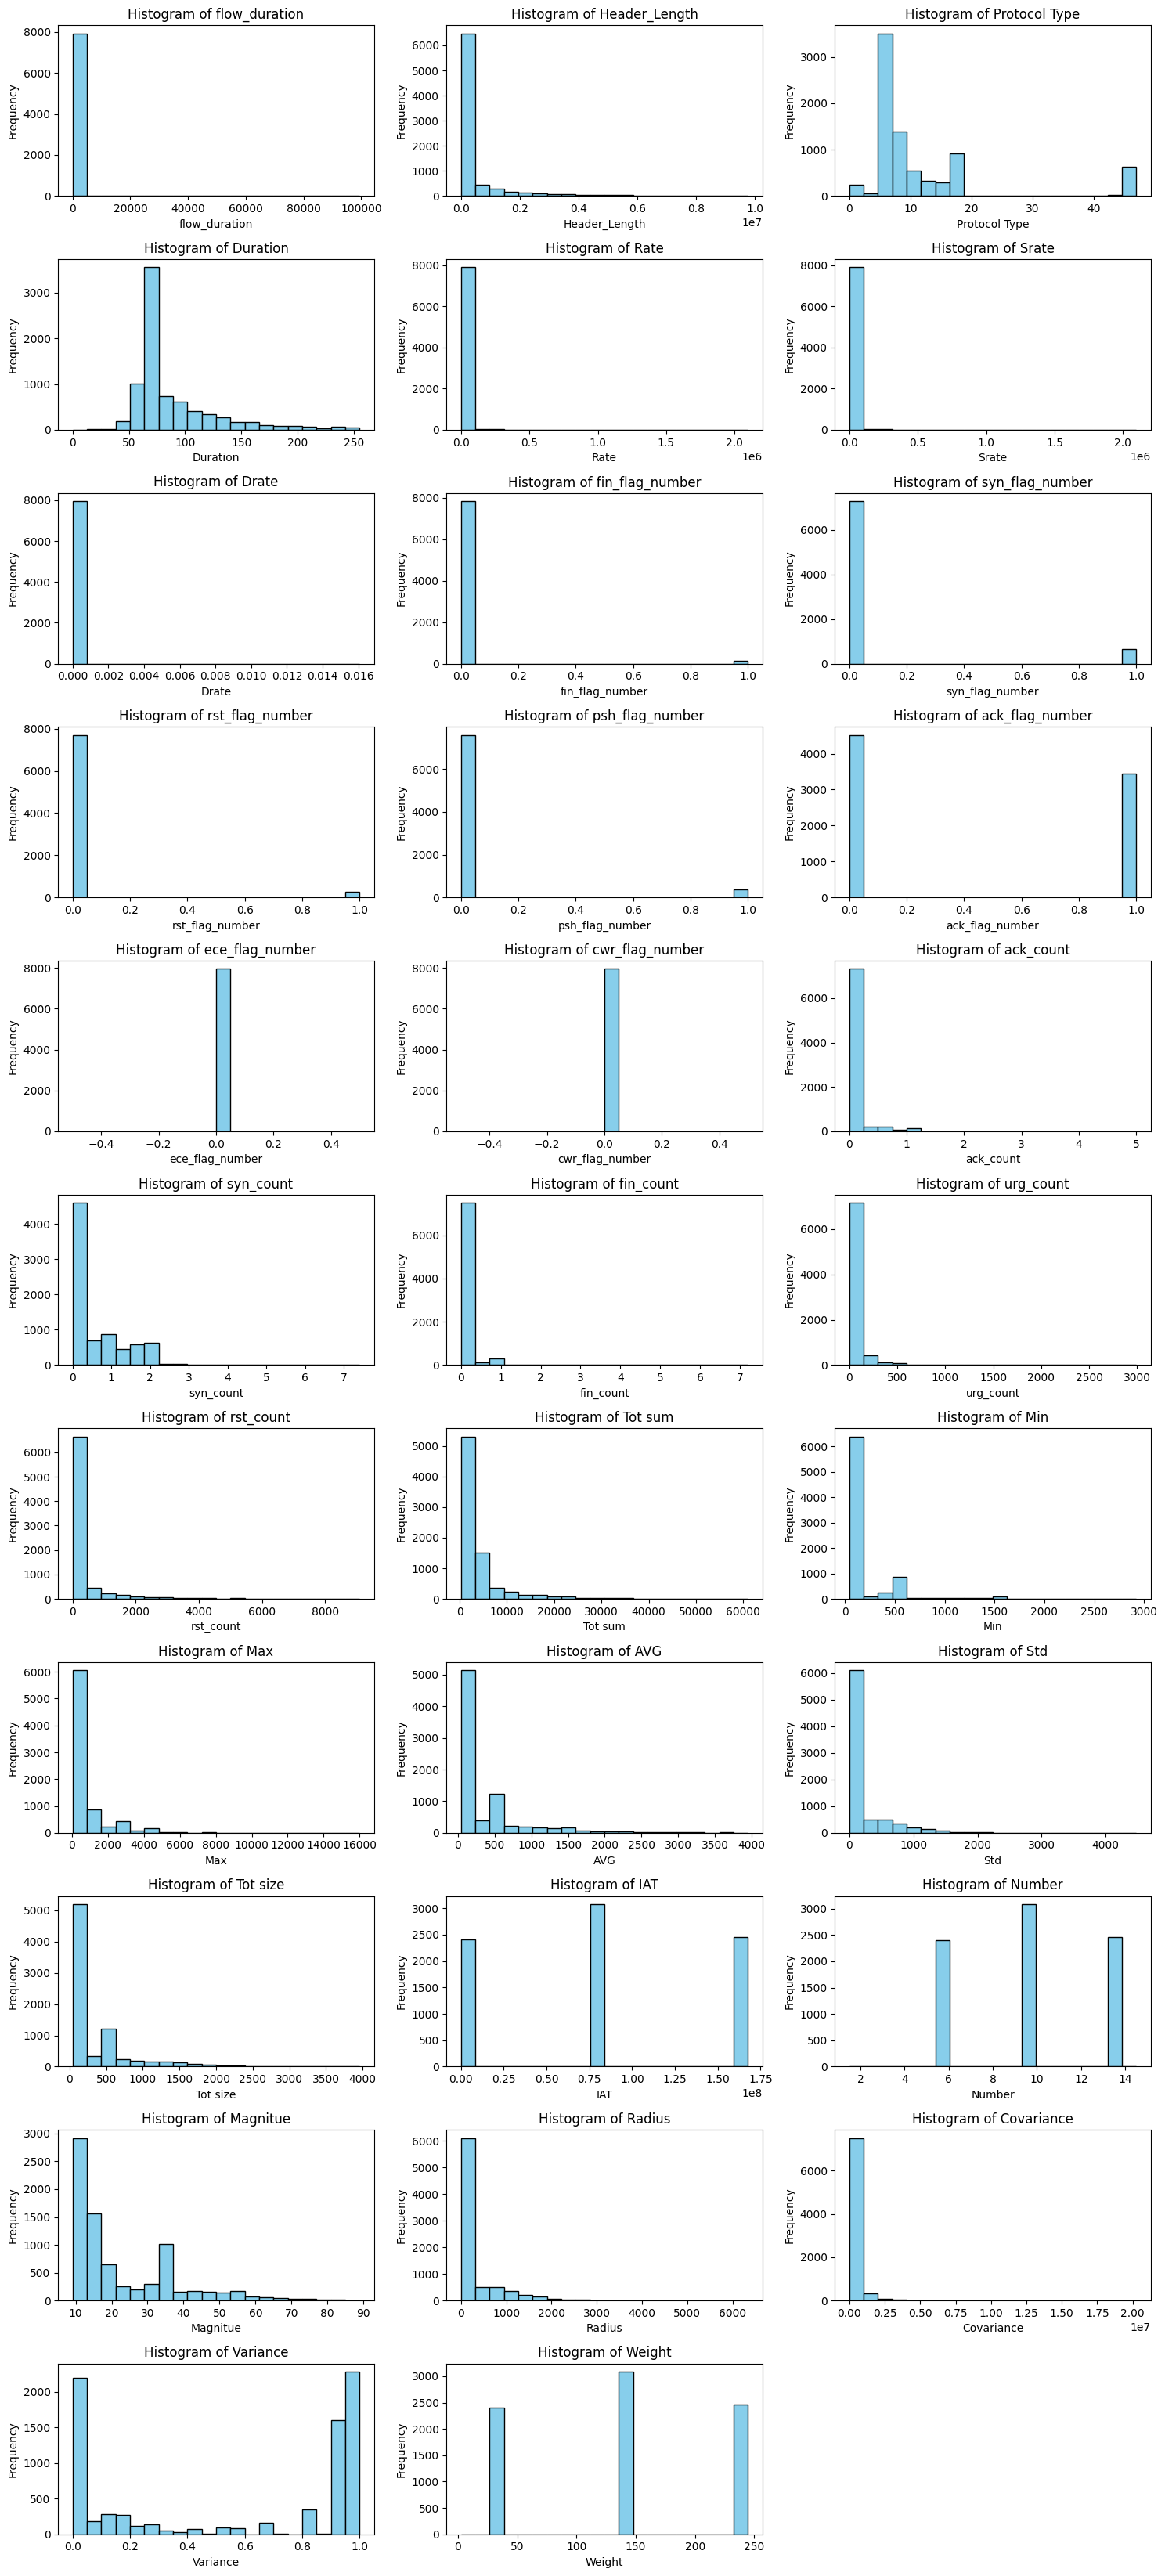

In [ ]:
n_cols = 3
n_rows = (len(numeric_df.columns) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Loop through the numeric columns and create a histogram for each
for ax, col in zip(axes, numeric_df.columns):
    ax.hist(numeric_df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any empty subplots that aren't needed
for ax in axes[len(numeric_df.columns):]:
    ax.set_visible(False)

# Adjust the layout so labels don't overlap
plt.tight_layout()

# Show the plot
plt.show()

## Correlations

In order to understand the correlation between the different features we look at the correlation matrix. The first matrix is too crowded as we have many features in our dataset. Thus, we define a threshold of 0.6 to be able to better visualize the matrix. We also tried just using some features.

Certain features like Tot sum, Min, Max, AVG, and Std show strong inter-correlations. These are related to packet sizes and lengths, so it's expected they would be highly correlated.

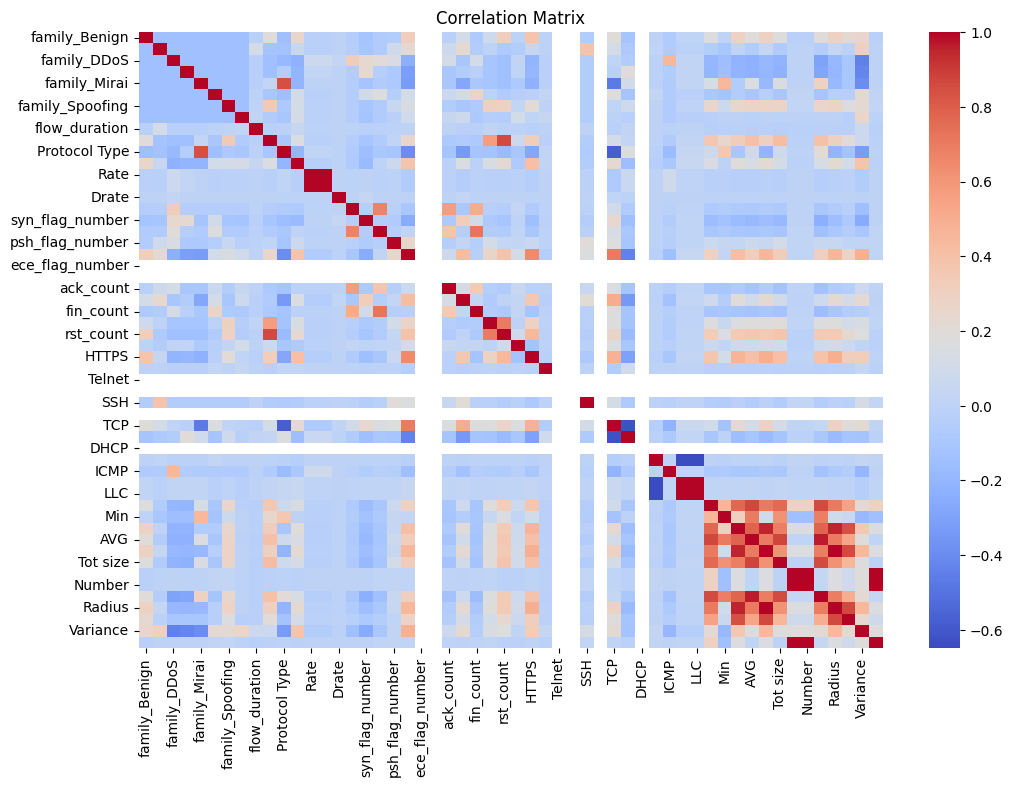

In [ ]:
# One-hot encode the 'family' column
encoder = OneHotEncoder(sparse=False)
family_encoded = encoder.fit_transform(df[['family']])
family_encoded_df = pd.DataFrame(family_encoded, columns=encoder.get_feature_names_out(['family']))

# Join the encoded df with the original df
encoded_df = pd.concat([family_encoded_df, df.drop('family', axis=1)], axis=1)

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

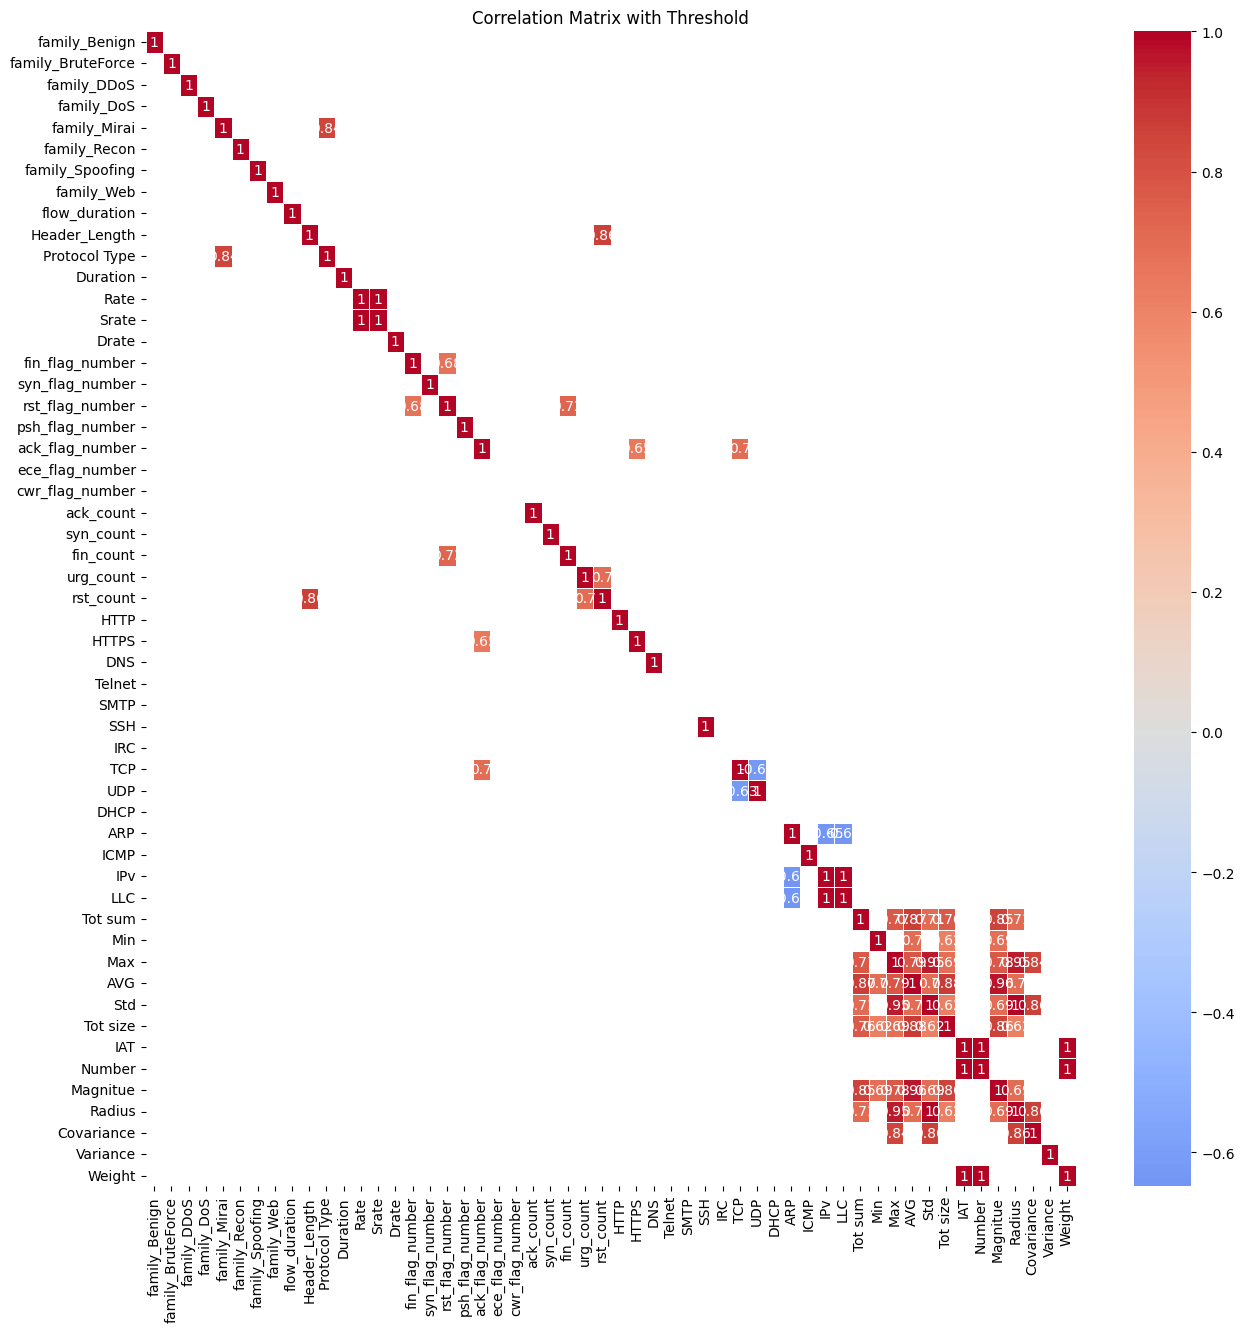

In [ ]:
# Define a threshold
threshold = 0.6

# Create a mask for values below the threshold
mask = np.abs(correlation_matrix) < threshold

# Apply the mask to the correlation matrix
filtered_corr = correlation_matrix.mask(mask)

# Create a heatmap with the masked correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(filtered_corr, cmap='coolwarm', center=0, annot=True, linewidths=.5)
plt.title('Correlation Matrix with Threshold')
plt.show()

## Distribution of binary columns

By plotting the distribution of the binary features we can see how they are distributed and understand the data's structure. 

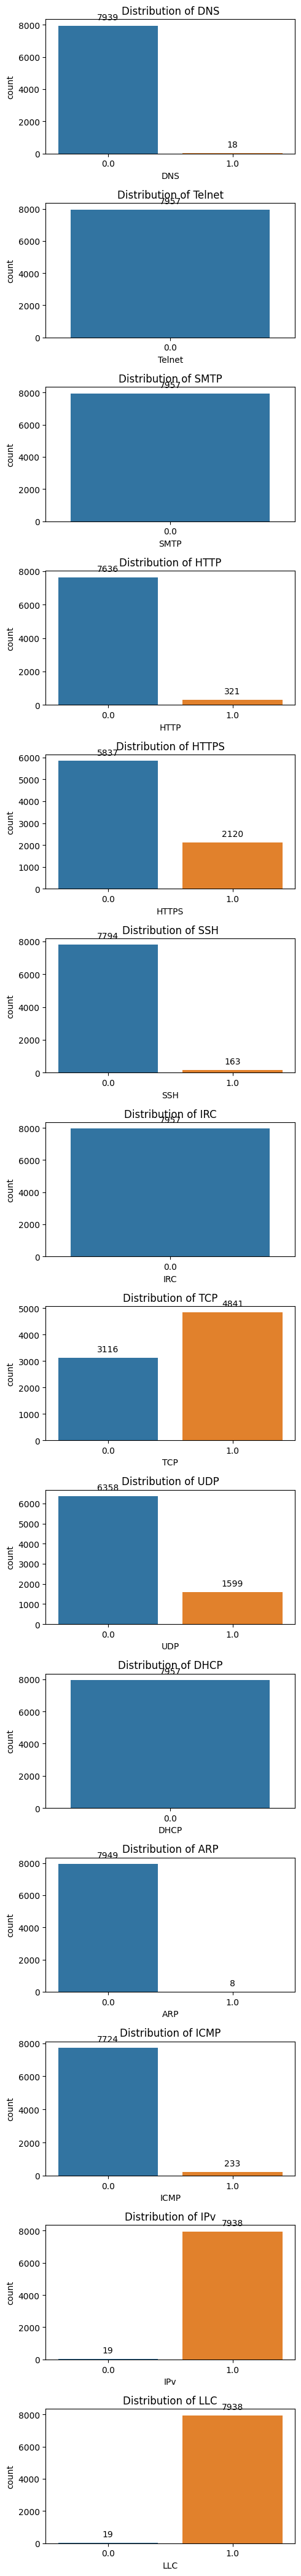

In [ ]:

binary_columns = ['DNS', 'Telnet', 'SMTP', 'HTTP', 'HTTPS', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']


# Plotting
fig, axes = plt.subplots(len(binary_columns), figsize=(5, 3 * len(binary_columns)))

if len(binary_columns) == 1:
    axes = [axes]

for i, col in enumerate(binary_columns):
    ax = sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    # Add count above each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.show()

### 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a3c41eb-c99a-4899-842d-6de17d10af25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>